In [9]:
from utils.image_utils import plot_XY, gen_index_file
from unet.dataset import SegThorImagesDataset

ImportError: cannot import name 'SegThorImagesDataset' from 'unet.dataset' (/Users/jkirsch/code/ecs271-finalproject/unet/dataset.py)

In [ ]:
# if index file doesn't exist, generate and save 
index_file_train = gen_index_file()

In [ ]:
index_file_train

'data/train_patient_idx.csv'

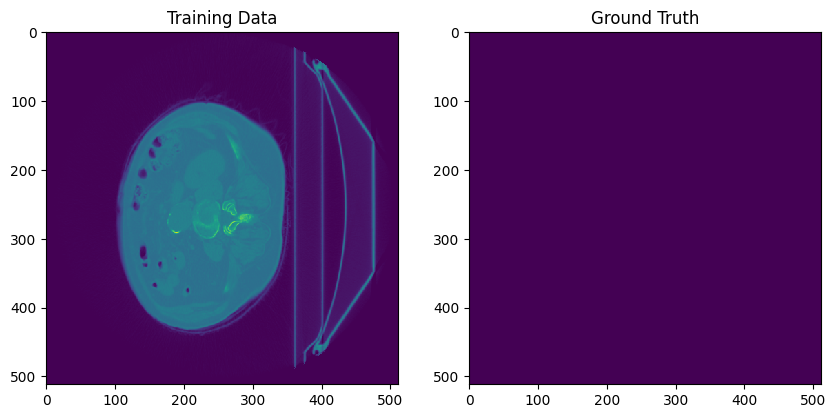

In [ ]:
# TODO: transform to crop to center 312x312
train_data = SegThorImagesDataset()
X, Y = next(iter(train_data))
plot_XY(X, Y)

In [ ]:
from unet import unet_model
from importlib import reload
reload(unet_model)
import torch 

model = unet_model.UNet(1, 2)

# data = torch.rand((5, 1, 572, 572))
data = X.unsqueeze(0)

temp_ = model(data)

temp_.shape # bottom of U is 1024 feature maps of 24^2b

Input x size: torch.Size([1, 1, 512, 512])
x1 size: torch.Size([1, 64, 508, 508])
x2 size: torch.Size([1, 128, 250, 250])
x3 size: torch.Size([1, 256, 121, 121])
x4 size: torch.Size([1, 512, 56, 56])
x5 size: torch.Size([1, 1024, 24, 24])
x after up1: torch.Size([1, 512, 44, 44])
x after up2: torch.Size([1, 256, 84, 84])
x after up3: torch.Size([1, 128, 164, 164])
x after up4: torch.Size([1, 64, 324, 324])


torch.Size([1, 2, 324, 324])